In [5]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten,
                                     Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
# Network parameters
NUM_CLASSES = 10
# Reshape 28x28 pixel images to a "flatten" array of 784 pixels
RESHAPED = 784
# no of neurons in a hidden layer
HIDDEN_NEURONS=256
#input image dimensions
IMG_ROWS, IMG_COLS =28, 28
INPUT_SHAPE= (IMG_ROWS, IMG_COLS, 1)

In [4]:
# Load the Fashion MNIST dataset
fashion_data = tf.keras.datasets.fashion_mnist
# Split between 60,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
#Reshape
train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS, 1)
train_images, test_images = train_images/255.0, test_images/255.0


4422102/4422102 [==============================] - 1s 0us/step


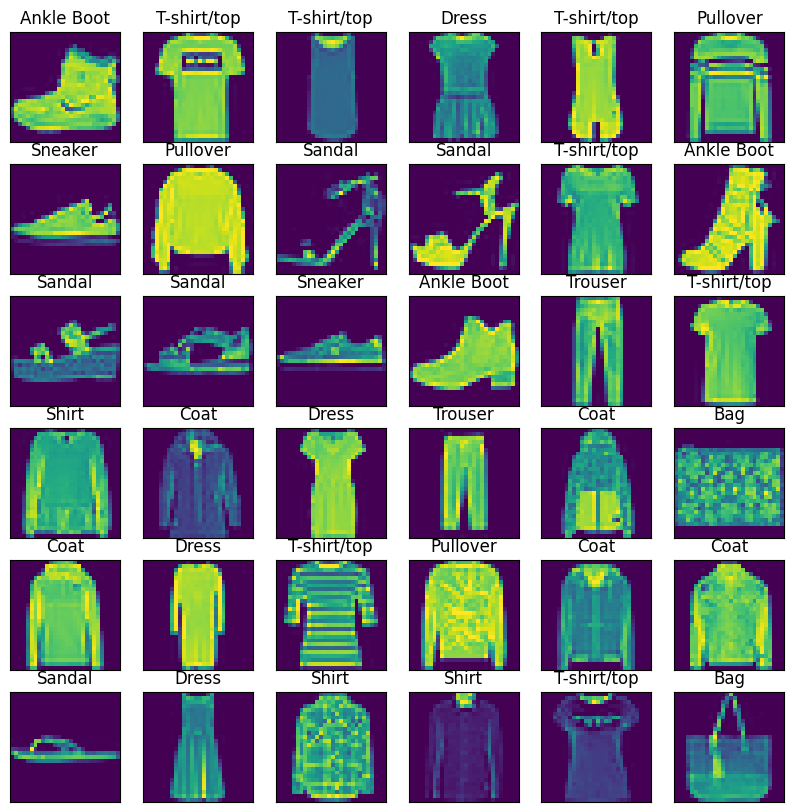

In [7]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

plt.figure(figsize=(10, 10))
for i in range(36):
  plt.subplot(6, 6, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS)))
  label_index = train_labels[i]
  plt.title(labels[label_index])
plt.show()


In [8]:
# One-hot representation of labels
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)


In [9]:
#define the architecture of our convolutional neural network,including dropout
#layers and 12 regularization

class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
        l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

        model = Sequential([

        # CONV => RELU => POOL

        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2, input_shape= input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),
        # CONV => RELU => POOL
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2) ,
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # CONV => RELU => POOL

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        Flatten(),
        Dropout (0.4),

        Dense(1024, activation='relu',kernel_regularizer=l2) ,
        Dropout (0.4),

        Dense(512, activation='relu', kernel_regularizer=l2),
        Dropout (0.2),

        Dense(NUM_CLASSES, activation='softmax')
        ])
        return model


In [10]:
# initialize the optimizer and model
model = cnn_fmnist.build(input_shape=INPUT_SHAPE, classes=NUM_CLASSES,
                         use_l2_reg=True,l2_loss_lambda=0.0015)

adam = Adam(learning_rate=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=adam,
               metrics=["accuracy"])
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

In [11]:
BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2 # how much of the training set is reserved for validation


In [12]:
history=model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT, verbose=1)


Epoch 1/50
375/375 [==============================] - 17s 12ms/step - loss: 4.0392 - accuracy: 0.5854 - val_loss: 4.3843 - val_accuracy: 0.4157
Epoch 2/50
375/375 [==============================] - 4s 10ms/step - loss: 3.3697 - accuracy: 0.7275 - val_loss: 3.1266 - val_accuracy: 0.7857
Epoch 3/50
375/375 [==============================] - 4s 9ms/step - loss: 3.0800 - accuracy: 0.7629 - val_loss: 2.8329 - val_accuracy: 0.8266
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 2.8188 - accuracy: 0.7883 - val_loss: 2.5995 - val_accuracy: 0.8405
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 2.5682 - accuracy: 0.8105 - val_loss: 2.3588 - val_accuracy: 0.8493
Epoch 6/50
375/375 [==============================] - 4s 10ms/step - loss: 2.3325 - accuracy: 0.8237 - val_loss: 2.1365 - val_accuracy: 0.8622
Epoch 7/50
375/375 [==============================] - 4s 10ms/step - loss: 2.1077 - accuracy: 0.8360 - val_loss: 1.9262 - val_accuracy: 0.8696

In [13]:
# Evaluate the model
score = model.evaluate(test_images, test_labels)
print("Test SCORE: ", score[0])
print("\nTest accuracy: ", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.9261
Test SCORE:  0.31642112135887146

Test accuracy:  0.9261000156402588


Text(0.5, 1.0, 'Train - Accuracy')

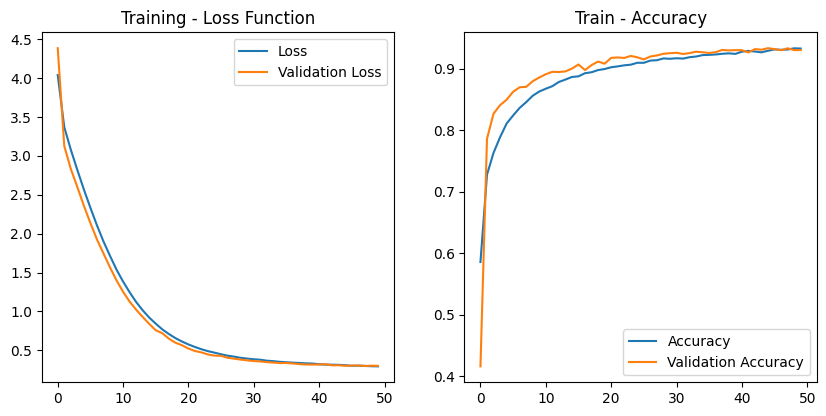

In [14]:

# Plot the loss and accuracy functions for the training and validation sets



plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.title('Train - Accuracy')


In [15]:
#get the predictions for the test data, convert to an integer value between 0 and 9
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)

#get the indices to be plotted
test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels) [0]
incorrect = np.nonzero(predicted_classes != test_labels) [0]


313/313 [==============================] - 1s 2ms/step


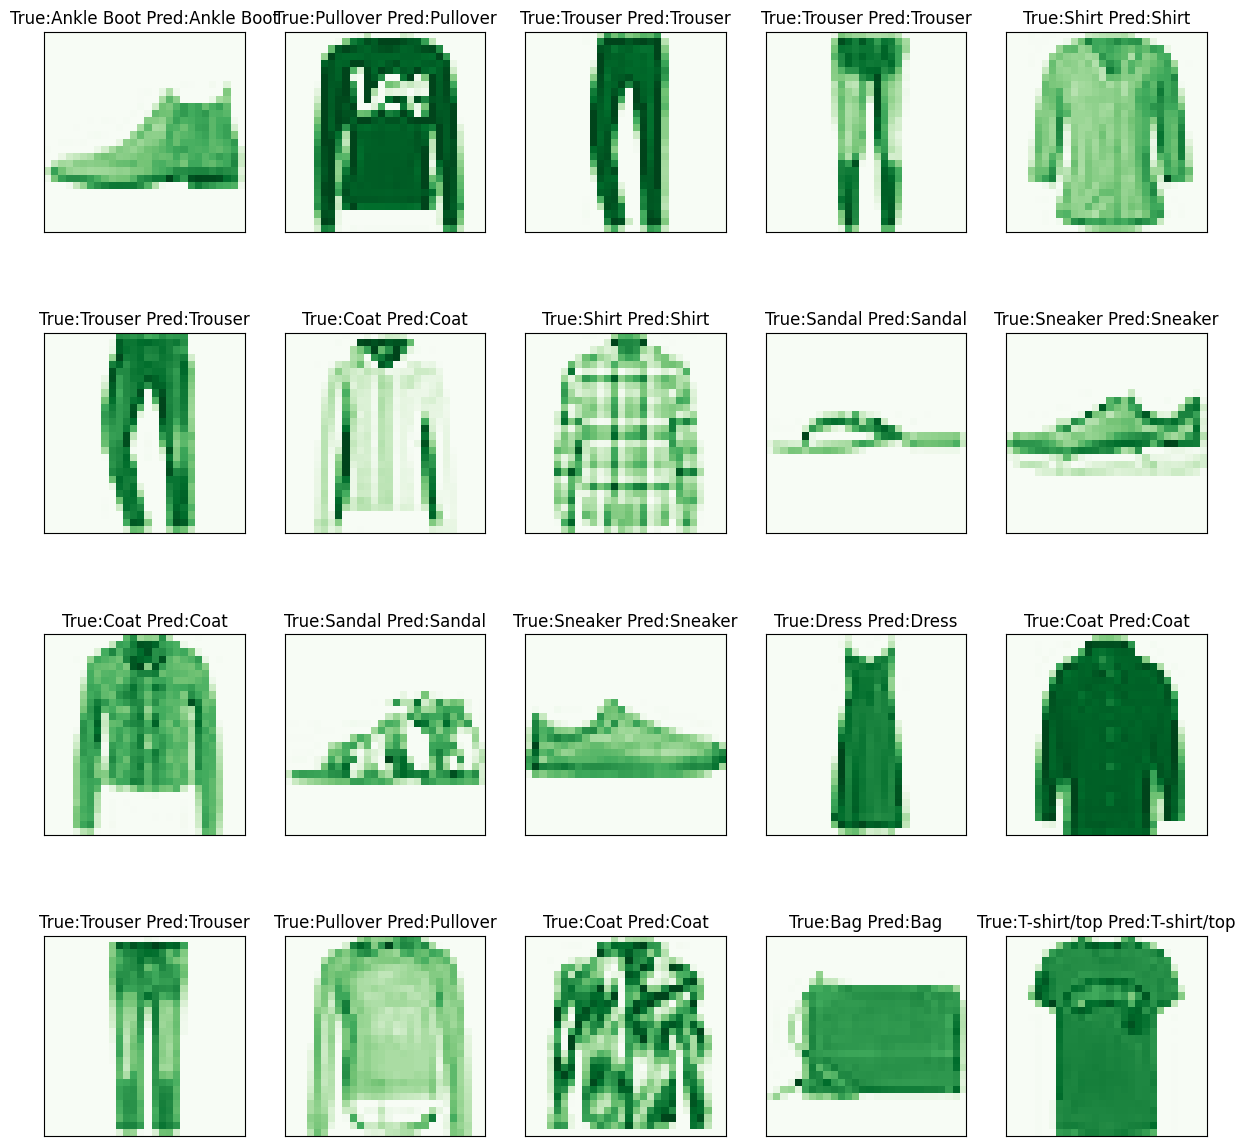

In [19]:
# Plot 16 correctly predicted images and their labels

plt.figure(figsize=(15, 15))
for i, indx in enumerate(correct[:20]):
  plt.subplot(4, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS,IMG_COLS)), cmap= "Greens")
  label_index = train_labels[indx]
  plt.title("True:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()
